# Chapter 1: 数ベクトル
## Agenda

- １次結合と部分空間
- １次従属と1次独立

## REMARKS

- 数値計算的な観点からではなく、数学的観点から線形代数を復習する


### Hardware

In [1]:
%%bash
system_profiler SPHardwareDataType | grep -E \
"Model Identifier"\|"Processor Name"\|"Processor Speed"\
\|"Number of Processors"\|"Memory:"

      Model Identifier: MacBookPro13,1
      Processor Name: Dual-Core Intel Core i5
      Processor Speed: 2 GHz
      Number of Processors: 1
      Memory: 16 GB


In [2]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.15.4
BuildVersion:	19E287


### Python

In [3]:
!python -V

Python 3.7.4


### Import

In [171]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sympy

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy import optimize

### Notation

Kは、実数全体の集合$\mathbb R$または複素数全体の集合$\mathbb C$のいずれかを表すとする。

## 1. 数ベクトル

#### 定義1.1
$$
\mathbf a = (a_1, ..., a_n)^T \text{ where } a_i \in K
$$

をn次元Kベクトルといい、$K = \mathbb R$の場合はn次元実数ベクトル、$K = \mathbb C$の場合はn次元複素数ベクトルという。$a_i$はベクトル$\mathbf a$の第i成分という。n次元Kベクトル全体の集合を$K^n$と書き、Kにおけるn次元数ベクトル空間という。また、Kの要素をスカラーという。[END]

#### 定義1.2: 逆ベクトル

任意の$\mathbf a \in K^n$に対して、

$$
\mathbf a + \mathbf a' = \mathbf 0
$$

を満たす$\mathbf a'$が存在し、$\mathbf a$の逆ベクトルという。[END]

#### 定義1.3: 線形結合

$K_n$のいくつかのベクトル$\mathbf a_1, ..., \mathbf a_m$にスカラー$c_i$をかけて加えて作られる

$$
c_1\mathbf a_1+ ... + c_m\mathbf a_m
$$

の形のベクトルを$\mathbf a_1, ..., \mathbf a_m$の線形結合、１次結合と呼ぶ。[END]


いま、$\mathbf a_1, ..., \mathbf a_m$を固定して、スカラーを自由にKの中を動かしてできる１次結合の全体を

$$
<\mathbf a_1, ..., \mathbf a_m> = \{\sum_i^m c_i \mathbf a_i | c_i \in K \}
$$

と表記する。


#### 定理 1.1
$<\mathbf a_1, ..., \mathbf a_m>$は線形演算に関して閉じている。すなわち、

$$
\mathbf a, \mathbf b \in <\mathbf a_1, ..., \mathbf a_m> \Rightarrow \mathbf a + \mathbf b \in <\mathbf a_1, ..., \mathbf a_m>\tag{1}
$$

$$
\mathbf a\in <\mathbf a_1, ..., \mathbf a_m>, c\in K \Rightarrow c\mathbf a \in <\mathbf a_1, ..., \mathbf a_m>\tag{2}
$$

定義より自明[END]

#### 定義1.4; 部分ベクトル空間

Vが$K^n$の空集合ではない部分集合であって、線形演算について閉じているとき、Vを$K^n$の部分ベクトル空間または単に部分空間という。[END]


#### 定義1.5

$<\mathbf a_1, ..., \mathbf a_m>$を$\mathbf a_1, ..., \mathbf a_m$で生成される$K^n$の部分ベクトル空間という。

### Example

$\mathbb R^3$で平面$x + y + z = 0$上の点Pに原点から引いたベクトルの全体をVとする。このとき、

$$
V = <(1, 0, -1)^T,(0, 1, -1)^T>
$$
と表せる。Pythonを用いてplotすると


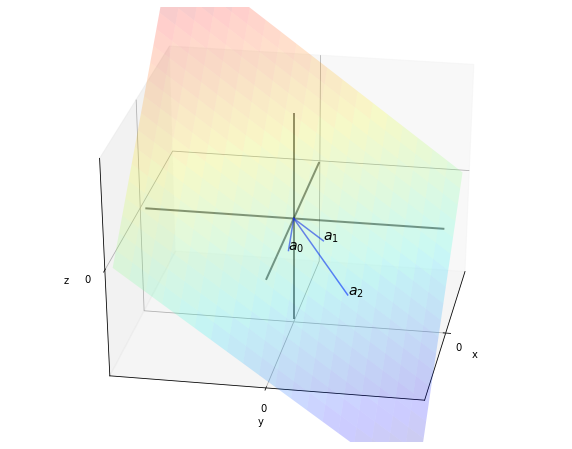

In [54]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

x_min, x_max = -5, 5
y_min, y_max = -5, 5

α, β = 1, 2

ax.set(xlim=(x_min, x_max), ylim=(x_min, x_max), zlim=(x_min, x_max),
       xticks=(0,), yticks=(0,), zticks=(0,))

gs = 3
z = np.linspace(x_min, x_max, gs)
x = np.zeros(gs)
y = np.zeros(gs)
ax.plot(x, y, z, 'k-', lw=2, alpha=0.5)
ax.plot(z, x, y, 'k-', lw=2, alpha=0.5)
ax.plot(y, z, x, 'k-', lw=2, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


# Fixed linear function, to generate a plane
def f(x, y):
    return α * x + β * y

# Vector locations, by coordinate
x_coords = np.array((1, 0, -1))
y_coords = np.array((0, 1, -1))
z = f(x_coords, y_coords)
for j, i in enumerate([x_coords, y_coords, z]):
    ax.text(i[0], i[1], i[2], f'$a_{j}$', fontsize=14)

# Lines to vectors
for i in (x_coords, y_coords, z):
    x = (0, i[0])
    y = (0, i[1])
    z = (0, i[2])
    ax.plot(x, y, z, 'b-', lw=1.5, alpha=0.6)

# Draw the plane
grid_size = 20
xr2 = np.linspace(x_min, x_max, grid_size)
yr2 = np.linspace(y_min, y_max, grid_size)
x2, y2 = np.meshgrid(xr2, yr2)
z2 = -x2 -y2
ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.jet,
                linewidth=0, antialiased=True, alpha=0.2)
ax.view_init(30, 10)
plt.show()

### １次従属と1次独立

$K^n$のベクトル$\mathbf a_1, ..., \mathbf a_m$の中のどれかが残りのm-1個のベクトルの一次結合で表せる場合、１次従属という。１次従属でないベクトルの組を１次独立であるという。

#### 定理
$\mathbf a_1, ..., \mathbf a_m$が１次従属であるための必要十分条件は

$$
\sum c_i\mathbf a_i = \mathbf 0 \iff c_1=\cdots=c_n=0
$$


### Pythonでの１次従属判定

In [131]:
def is_linear_independence(array, row = True):
    """
    Return
        return index of independent set of vector
    Params
        array: numpy.array
        row: Boolean
             if True, check linear independence of set of row-vectors
    """
    M = sympy.Matrix(array)
    if row:
        M = M.T
    return M.rref()[1]

In [132]:
A = np.array([[0,0,1,0,1],[0,0,1,0,1 ],[0,1,1,0, 1],[1,0,0,1, 1]])
A

array([[0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1],
       [0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1]])

In [134]:
is_linear_independence(A, row = True)

(0, 2, 3)

## 2. 練習問題

### 2-1: ベクトルの長さと内積

$a = (1, -1), b = (3, 4)$について、

（１） 各ベクトルのノルムと内積を求めよ

In [143]:
a = np.array([1, -1])
b = np.array([3, 4])

print('the norm is ||a|| = {}, ||b|| = {}'.format(np.linalg.norm(a).round(3), np.linalg.norm(b)))

the norm is ||a|| = 1.414, ||b|| = 5.0


In [147]:
print('the inner product is {}'.format(sum(a*b)))

the inner product is -1


(2) a, bのなす角を$\theta$とするとき、$\cos \theta$を求めよ

In [149]:
sum(a*b)/(np.linalg.norm(a) * np.linalg.norm(b))

-0.1414213562373095

(3) $x = (2, 3)$をa, bの１次結合で表せ

In [161]:
x = np.array([2,3])
A = np.vstack([a, b]).T
np.linalg.solve(A, x)

array([-0.14285714,  0.71428571])

### 2-2

$a = [1, -1, 1], b = [1, 2, 2]$について、

(1) 各ベクトルのノルムと内積を求めよ

In [163]:
a = np.array([1, -1, 1])
b = np.array([1, 2, 2])
print('the norm is ||a|| = {}, ||b|| = {}'.format(np.linalg.norm(a).round(3), np.linalg.norm(b)))

the norm is ||a|| = 1.732, ||b|| = 3.0


(2) a, bのなす角を$\theta$とするとき、$\cos \theta$を求めよ

In [164]:
a@b/(np.linalg.norm(a) * np.linalg.norm(b))

0.19245008972987526

(3) $x = [2, 1, t]$がa, bの一次結合で表せるようにtを求めよ。

In [170]:
x = np.array([2, 1])
A = np.vstack([a[:-1], b[:-1]]).T
coef = np.linalg.solve(A, x)
np.array([1, 2]) @ coef

3.0

### 2-3: 垂線の長さ

$a = [1,1,1]$を通り、$p = [1, 2, 1]$に垂直である平面の方程式を求めよ

[解答]

平面上の点をP, $[1, 1, 1] = C$とすれば、$CP \perp p$ だから内積は0となる。よって、

$$
(x - 1) + (y - 2)\cdot 2 + (z-1) = 0
$$

Then, $x + 2y + z = 4$ [END]